## Keras model - DenseNet 
---- 

* **features**

> - DenseNet implementation 
> -  Three Dense block 
> - lower learning rate for Optimizer  

In [1]:
import numpy as np 
import pickle 

# load dataset 
# with open('../sample_image/sample560_crop_df.bin', 'rb') as f :
#     crop_img = pickle.load(f)

with open('../sample_image/final_df.bin', 'rb') as f :
    crop_img = pickle.load(f)

    
# X = np.array([i for i in crop_img.crop_img_03])
X = np.array([i for i in crop_img.crop_images])
y = crop_img.weight.values

idx = list(np.random.choice(range(len(X)), int(len(X) * 0.8), replace=False))
test_idx = list(set(list(range(len(X)))) - set(idx))

X_train = X[idx]
y_train = y[idx]

X_test = X[test_idx]
y_test = y[test_idx]

In [2]:
X.shape

(560, 250, 550, 3)

### Parameters 

In [3]:
BATCH_SIZE = 24 
LOSS = "mean_squared_error"
OPTIMIZER = ["adagrad", "adadelta", "adam", "adamax", "rmsprob"]

### Model Architecture

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.engine.input_layer import Input
from keras.models import Model
from keras import regularizers 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate, AveragePooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.regularizers import l2


def DenseNet():
    
    inputs = Input(shape=(250, 550, 3))
    
    conv_1 = Conv2D(16, (7, 7), strides=2, padding='same')(inputs)
    act_1 = Activation('relu')(conv_1)
    max_pool = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(act_1)
    
    ##### DENSE BLOCK 1 #####
    
    bn_1 = BatchNormalization()(max_pool)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_1 =concatenate([act_2, max_pool], axis=-1)
    
    bn_1 = BatchNormalization()(merged_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_2 =concatenate([act_2, merged_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_2)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_3 =concatenate([act_2, merged_2], axis=-1)
    
    bn_1 = BatchNormalization()(merged_3)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_4 =concatenate([act_2, merged_3], axis=-1)
    
    ###### Transition layer 1 #####

    conv_1 = Conv2D(32, (1, 1), padding='same')(merged_4)
    act_1 = Activation('relu')(conv_1)
    avg_p_1 = AveragePooling2D(strides=2)(act_1)
    
    
    ##### DENSE BLOCK 2 #####
    
    bn_1 = BatchNormalization()(avg_p_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_1 =concatenate([act_2, avg_p_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_2 =concatenate([act_2, merged_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_2)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_3 =concatenate([act_2, merged_2], axis=-1)
    
    bn_1 = BatchNormalization()(merged_3)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_4 =concatenate([act_2, merged_3], axis=-1)
    
    ###### Transition layer 2 #####

    conv_1 = Conv2D(32, (1, 1), padding='same')(merged_4)
    act_1 = Activation('relu')(conv_1)
    avg_p_1 = AveragePooling2D(strides=2)(act_1)
    
    
    ##### DENSE BLOCK 3 #####
    
    bn_1 = BatchNormalization()(avg_p_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_1 =concatenate([act_2, avg_p_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_2 =concatenate([act_2, merged_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_2)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_3 =concatenate([act_2, merged_2], axis=-1)
    
    bn_1 = BatchNormalization()(merged_3)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_4 =concatenate([act_2, merged_3], axis=-1)
    
    ## Dense Layer with GlobalAveragePooling
    
    global_avg_p = GlobalAveragePooling2D()(merged_4)
    denselayer = Dense(100, activation='elu', kernel_regularizer=l2(0.001))(global_avg_p)
    output = Dense(1)(denselayer)
    
    
    model = Model(inputs=[inputs], outputs=[output])
        
    return model 


Using TensorFlow backend.


In [5]:
from keras.utils.training_utils import multi_gpu_model
from keras.optimizers import Adam
from keras import losses

model = DenseNet()
op = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-10, decay=0.008, amsgrad=False)
model = multi_gpu_model(model, gpus=2)

## loss func : Mean squared error --> mean absoulute error 
model.compile(loss='mean_absolute_error', optimizer=op, metrics=['mae'])

In [6]:
%%time
hist = model.fit(X_train, y_train, epochs=100, batch_size=24, validation_data=(X_test, y_test), verbose=2)

Train on 448 samples, validate on 112 samples
Epoch 1/100
 - 24s - loss: 42.2255 - mean_absolute_error: 42.1485 - val_loss: 20.0379 - val_mean_absolute_error: 19.9636
Epoch 2/100
 - 4s - loss: 14.4776 - mean_absolute_error: 14.4052 - val_loss: 13.2619 - val_mean_absolute_error: 13.1913
Epoch 3/100
 - 4s - loss: 11.1058 - mean_absolute_error: 11.0363 - val_loss: 98.1426 - val_mean_absolute_error: 98.0740
Epoch 4/100
 - 4s - loss: 7.8856 - mean_absolute_error: 7.8178 - val_loss: 30.3082 - val_mean_absolute_error: 30.2413
Epoch 5/100
 - 4s - loss: 7.5209 - mean_absolute_error: 7.4549 - val_loss: 29.6023 - val_mean_absolute_error: 29.5370
Epoch 6/100
 - 4s - loss: 6.9486 - mean_absolute_error: 6.8839 - val_loss: 16.4697 - val_mean_absolute_error: 16.4056
Epoch 7/100
 - 4s - loss: 6.6663 - mean_absolute_error: 6.6027 - val_loss: 9.6736 - val_mean_absolute_error: 9.6105
Epoch 8/100
 - 4s - loss: 5.8040 - mean_absolute_error: 5.7413 - val_loss: 8.0570 - val_mean_absolute_error: 7.9947
Epoch 9

Epoch 71/100
 - 4s - loss: 3.1041 - mean_absolute_error: 3.0489 - val_loss: 3.0098 - val_mean_absolute_error: 2.9546
Epoch 72/100
 - 4s - loss: 3.0494 - mean_absolute_error: 2.9942 - val_loss: 3.4014 - val_mean_absolute_error: 3.3462
Epoch 73/100
 - 4s - loss: 3.0548 - mean_absolute_error: 2.9996 - val_loss: 4.8267 - val_mean_absolute_error: 4.7715
Epoch 74/100
 - 4s - loss: 2.8517 - mean_absolute_error: 2.7965 - val_loss: 3.5362 - val_mean_absolute_error: 3.4810
Epoch 75/100
 - 4s - loss: 3.0230 - mean_absolute_error: 2.9679 - val_loss: 3.5873 - val_mean_absolute_error: 3.5322
Epoch 76/100
 - 4s - loss: 2.9270 - mean_absolute_error: 2.8719 - val_loss: 3.4600 - val_mean_absolute_error: 3.4049
Epoch 77/100
 - 4s - loss: 3.0113 - mean_absolute_error: 2.9562 - val_loss: 3.1153 - val_mean_absolute_error: 3.0602
Epoch 78/100
 - 4s - loss: 2.7893 - mean_absolute_error: 2.7342 - val_loss: 4.2938 - val_mean_absolute_error: 4.2388
Epoch 79/100
 - 4s - loss: 2.7001 - mean_absolute_error: 2.6451 

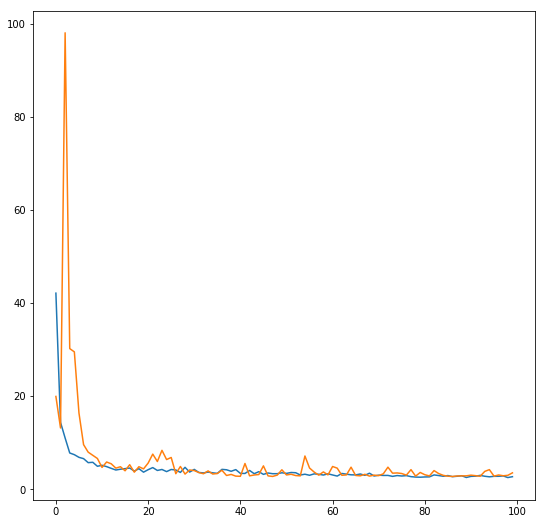

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
plt.plot(hist.history["mean_absolute_error"])
plt.plot(hist.history["val_mean_absolute_error"])
plt.show()

In [10]:
pred = model.predict(X_test)
for i, j in zip(pred, y_test):
    print("prediction : {}, Truth : {} ".format(i, j))

prediction : [126.894516], Truth : 124.51 
prediction : [92.6788], Truth : 98.14 
prediction : [90.23637], Truth : 97.42 
prediction : [92.99614], Truth : 94.2 
prediction : [90.73549], Truth : 92.01 
prediction : [93.7276], Truth : 91.66 
prediction : [124.78205], Truth : 128.98 
prediction : [112.058044], Truth : 121.74 
prediction : [89.94194], Truth : 90.35 
prediction : [93.71234], Truth : 97.13 
prediction : [124.97804], Truth : 120.63 
prediction : [93.60319], Truth : 92.69 
prediction : [90.867935], Truth : 93.89 
prediction : [124.34517], Truth : 127.88 
prediction : [93.01795], Truth : 93.22 
prediction : [125.011215], Truth : 128.82 
prediction : [94.69519], Truth : 91.98 
prediction : [122.8254], Truth : 123.6 
prediction : [94.9436], Truth : 92.87 
prediction : [94.09334], Truth : 99.49 
prediction : [91.75173], Truth : 96.27 
prediction : [94.15649], Truth : 98.04 
prediction : [94.06769], Truth : 92.88 
prediction : [92.12535], Truth : 92.73 
prediction : [92.9959], Trut

In [ ]:
from keras.models import load_model
import pickle
import h5py

model.save('DenseNet_0720_150Epochs.hdf5')
del model 